# **Libraries**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### **plt settings**

In [ ]:
plt.style.use('default')
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_style('white')
sns.despine()

# **Data**

In [10]:
n = 100

In [11]:
def class_1():
    while(True):
        x = np.random.uniform(2.5, 4.5)
        y = np.random.uniform(0, 2)

        if y - 2 * x + 5 < 0 and y + 2 * x - 9 < 0:
            return x, y

def class_2():
    while(True):
        x = np.random.uniform(2.5, 4.5)
        y = np.random.uniform(0, 2)

        if (y - 2 * x + 5 < 0 or y + 2 * x - 9 < 0) and ((y - 2 * x + 5 < 0 and y + 2 * x - 9 < 0) == False) and y <= 2:
            return x, y

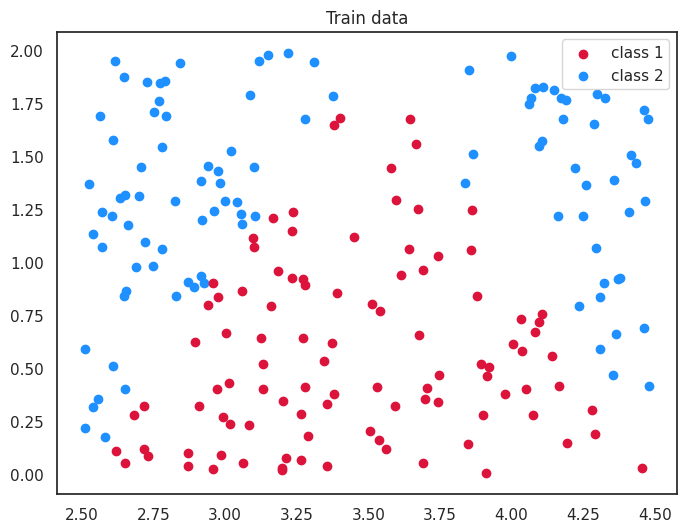

In [12]:
data = []
X_train = []
y_train = []

for i in range(n):
    if(i == n - 1):
        x, y = class_1()
        X_train.append([x, y])
        y_train.append(1)
        data.append([x, y, 1])
        plt.scatter(x, y, color='crimson', label='class 1')
        x, y = class_2()
        X_train.append([x, y])
        y_train.append(-1)
        data.append([x, y, -1])
        plt.scatter(x, y, color='dodgerblue', label='class 2')
        break
    x, y = class_1()
    data.append([x, y, 1])
    X_train.append([x, y])
    y_train.append(1)
    plt.scatter(x, y, color='crimson')
    x, y = class_2()
    data.append([x, y, -1])
    X_train.append([x, y])
    y_train.append(-1)
    plt.scatter(x, y, color='dodgerblue')

plt.legend()
plt.title('Train data')
plt.show()

# **Class Neural Network**

In [126]:
class NeuralNetwork():
    def __init__(self, iterations=100, learning_rate=0.1,
                 silence='False'):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.silence = silence
        
        self.w_1 = np.random.uniform(-1, 1)
        self.w_2 = np.random.uniform(-1, 1)
        self.w_3 = np.random.uniform(-1, 1)
        self.w_4 = np.random.uniform(-1, 1)
        self.w_5 = np.random.uniform(-1, 1)
        self.w_6 = np.random.uniform(-1, 1)

        

    def activation_function(self, x):
        # tanh
        return 2 / (1 + np.exp(-x)) - 1

    def activation_derivative(self, x):
        # tanh derivative
        return (1 + self.activation_function(x)) * (1 - self.activation_function(x)) / 2

    def go_forward(self, x, y):

        first_layer_first_neuron = self.w_1 * x + self.w_2 * y + self.w_3
        first_layer_second_neuron = self.w_4 * x + self.w_5 * y + self.w_6

        second_layer_first_neuron = self.activation_function(first_layer_first_neuron)
        second_layer_second_neuron = self.activation_function(first_layer_second_neuron)

        third_layer = second_layer_first_neuron * second_layer_second_neuron

        output = self.activation_function(third_layer)

        return first_layer_first_neuron, first_layer_second_neuron, \
        second_layer_first_neuron, second_layer_second_neuron, \
        third_layer, output

    def computeGradient(self, 
                        first_layer_first_neuron, first_layer_second_neuron,
                        second_layer_first_neuron, second_layer_second_neuron,
                        third_layer, x, y, y_real):
        grad = [0, 0, 0, 0, 0, 0]
        grad[0] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_second_neuron) * self.activation_derivative(first_layer_first_neuron) * x
        grad[1] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_second_neuron) * self.activation_derivative(first_layer_first_neuron) * y
        grad[2] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_second_neuron) * self.activation_derivative(first_layer_first_neuron) * 1 
        grad[3] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_first_neuron) * self.activation_derivative(first_layer_second_neuron) * x 
        grad[4] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_first_neuron) * self.activation_derivative(first_layer_second_neuron) * y
        grad[5] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_first_neuron) * self.activation_derivative(first_layer_second_neuron) * 1
        
        return grad


    def fit(self, X_train, y_train):
        
        for i in range(self.iterations):
            for j in range(len(X_train)):
                y_real = y_train[j]

                first_layer_first_neuron, first_layer_second_neuron, \
                second_layer_first_neuron, second_layer_second_neuron, \
                third_layer, output = self.go_forward(X_train[j][0], X_train[j][1])
                loss = max(0, - output * y_real)
                
                if loss != 0:
                    grad = self.computeGradient(first_layer_first_neuron, first_layer_second_neuron,
                        second_layer_first_neuron, second_layer_second_neuron,
                        third_layer, X_train[j][0], X_train[j][1], y_real)
                    
                    self.w_1 -= self.learning_rate * grad[0]
                    self.w_2 -= self.learning_rate * grad[1]
                    self.w_3 -= self.learning_rate * grad[2]
                    self.w_4 -= self.learning_rate * grad[3]
                    self.w_5 -= self.learning_rate * grad[4]
                    self.w_6 -= self.learning_rate * grad[5]
    
    def predict(self, X):
        a, b, c, d, e, prediction = self.go_forward(X[0], X[1])
        return prediction

# **Fitting and predictions**

In [127]:
nn = NeuralNetwork(iterations=10000, learning_rate=0.1)
nn.fit(X_train, y_train)

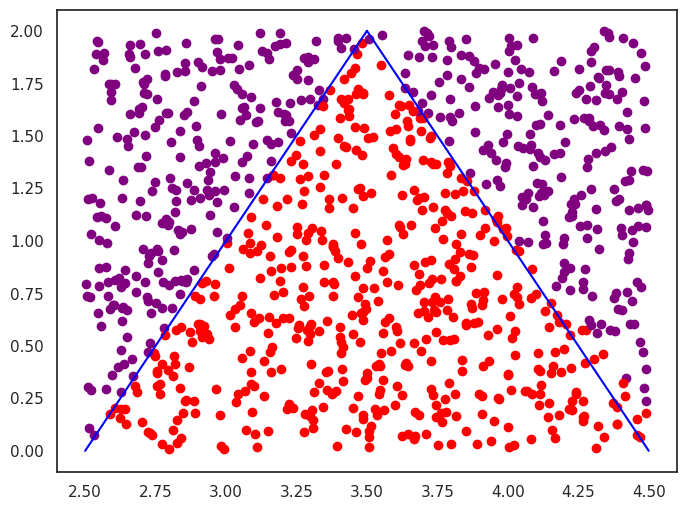

In [128]:
plt.plot([2.5, 3.5], [0, 2], color='blue')
plt.plot([4.5, 3.5], [0, 2], color='blue')



for i in range(1000):
    x = np.random.uniform(2.5, 4.5)
    y = np.random.uniform(0, 2)

    pred = nn.predict([x, y])

    if(pred > 0):
        plt.scatter(x, y, color='red')
    else:
        plt.scatter(x, y, color='purple')



plt.show()